In [1]:
import matplotlib.pyplot as plt
import torch
from PIL import Image
from torchvision import transforms
from resnetgen import ResNetGenerator

In [10]:
class Horse2Zebra:
    def __init__(self):
        self.netG = ResNetGenerator()
        model_data_file = 'p1ch2/horse2zebra_0.4.0.pth'
        model_data = torch.load(model_data_file)
        self.netG.load_state_dict(model_data)
        self.netG.eval()
        self.preprocess = transforms.Compose([
            transforms.Resize(256),
            transforms.ToTensor()
        ])
        
    def convert(self, img_file):
        img = Image.open(img_file).convert('RGB')
        img_t = self.preprocess(img)
        img_batch = torch.unsqueeze(img_t, 0)        
        out_batch = self.netG(img_batch)
        out_t = (out_batch.data.squeeze() + 1.0)/2.0
        out_img = transforms.ToPILImage()(out_t)
        return transforms.ToPILImage()(img_t), out_img

    def show2(self, i1, i2):
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,12))
        for ax, img in zip(axs, [i1, i2]):
            ax.imshow(img)
            ax.axis('off')
    
h2z = Horse2Zebra()

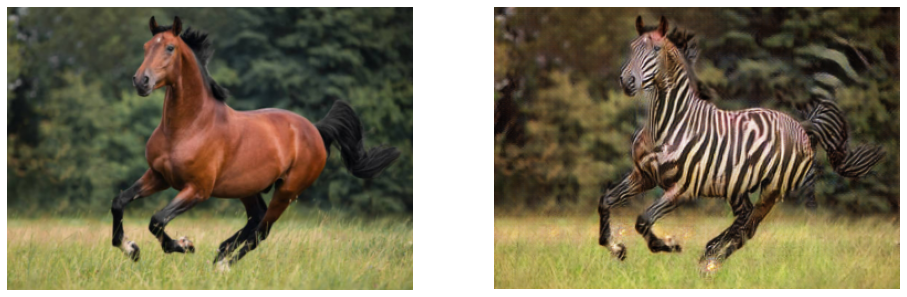

In [11]:
in_img, out_img = h2z.convert('horse1.png')
h2z.show2(in_img, out_img)

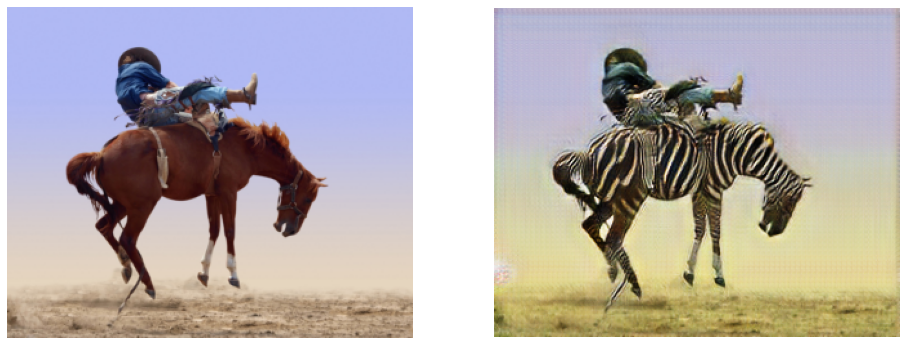

In [12]:
in_img, out_img = h2z.convert('p1ch2/horse.jpg')
h2z.show2(in_img, out_img)